In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [4]:
df1=pd.read_csv('calories.csv')
df2=pd.read_csv('exercise.csv')

In [6]:
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [20]:
#merging the above dataframes on the basis of user_id
df=pd.merge(df1,df2,on='User_ID')

In [22]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [26]:
df.shape

(15000, 9)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [28]:
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


C:\Users\rubha\AppData\Local\Temp\ipykernel_53876\2872108529.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

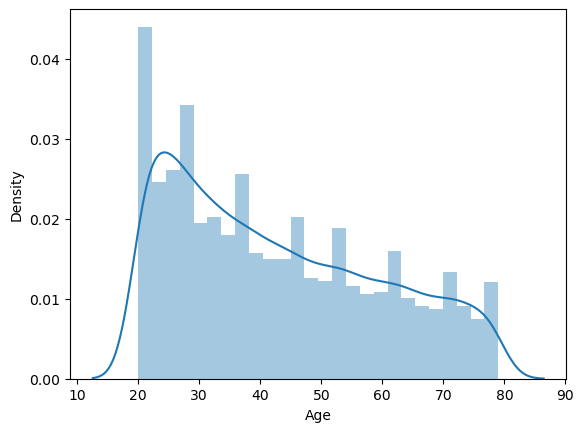

In [38]:
sns.distplot(df['Age'])


C:\Users\rubha\AppData\Local\Temp\ipykernel_53876\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

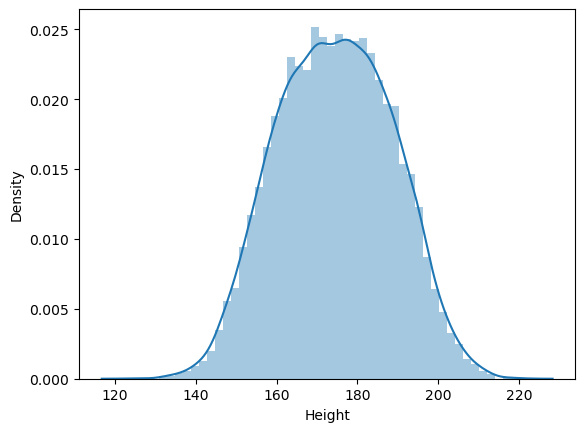

In [42]:
sns.distplot(df['Height'])

C:\Users\rubha\AppData\Local\Temp\ipykernel_53876\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

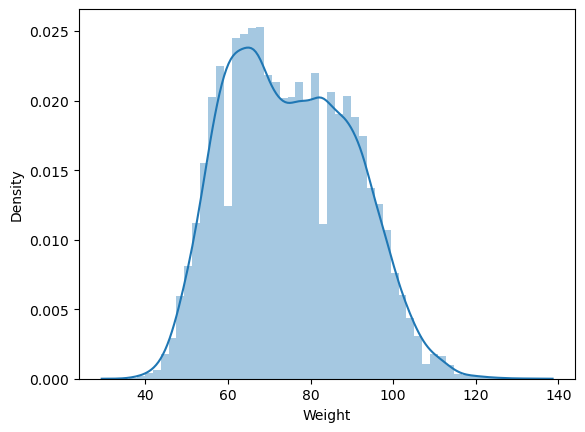

In [44]:
sns.distplot(df['Weight'])

C:\Users\rubha\AppData\Local\Temp\ipykernel_53876\1351347043.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

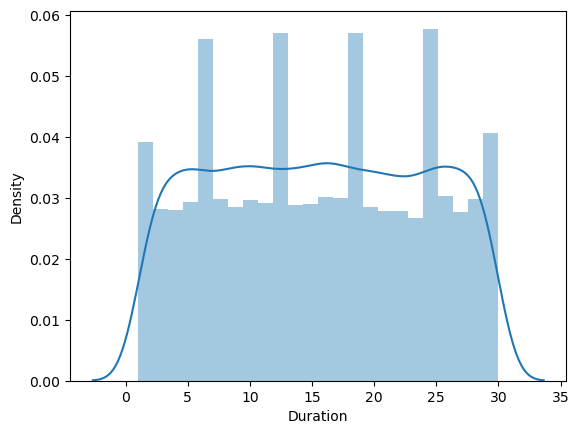

In [46]:
sns.distplot(df['Duration'])

<Axes: xlabel='count', ylabel='Gender'>

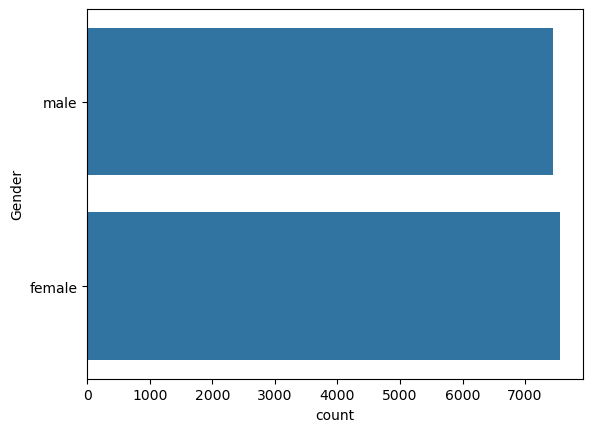

In [48]:
sns.countplot(df['Gender'])

<Axes: xlabel='Age', ylabel='Weight'>

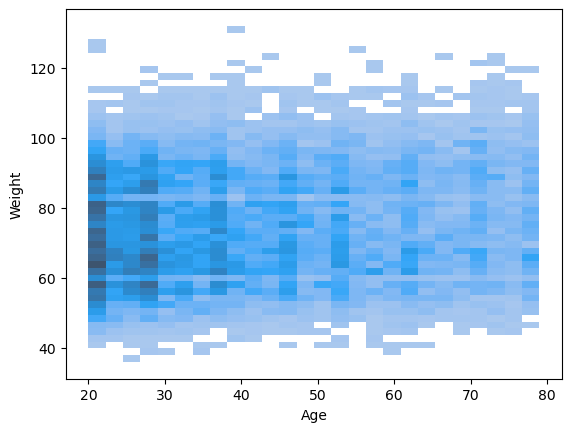

In [56]:
sns.histplot(x=df['Age'],y=df['Weight'])

In [116]:
df.select_dtypes(exclude=object).skew()

User_ID       0.004788
Calories      0.505371
Age           0.473383
Height       -0.006190
Weight        0.226725
Duration      0.004751
Heart_Rate   -0.010704
Body_Temp    -0.994382
dtype: float64

In [114]:
df.select_dtypes(exclude=object).corr()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
User_ID,1.000000,-0.001661,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923
Calories,-0.001661,1.000000,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558
Age,-0.001827,0.154395,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175
Height,-0.013520,0.017537,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200
Weight,-0.011603,0.035481,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095
Duration,-0.002751,0.955421,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167
Heart_Rate,-0.000457,0.897882,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529
Body_Temp,0.000923,0.824558,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000


<Axes: >

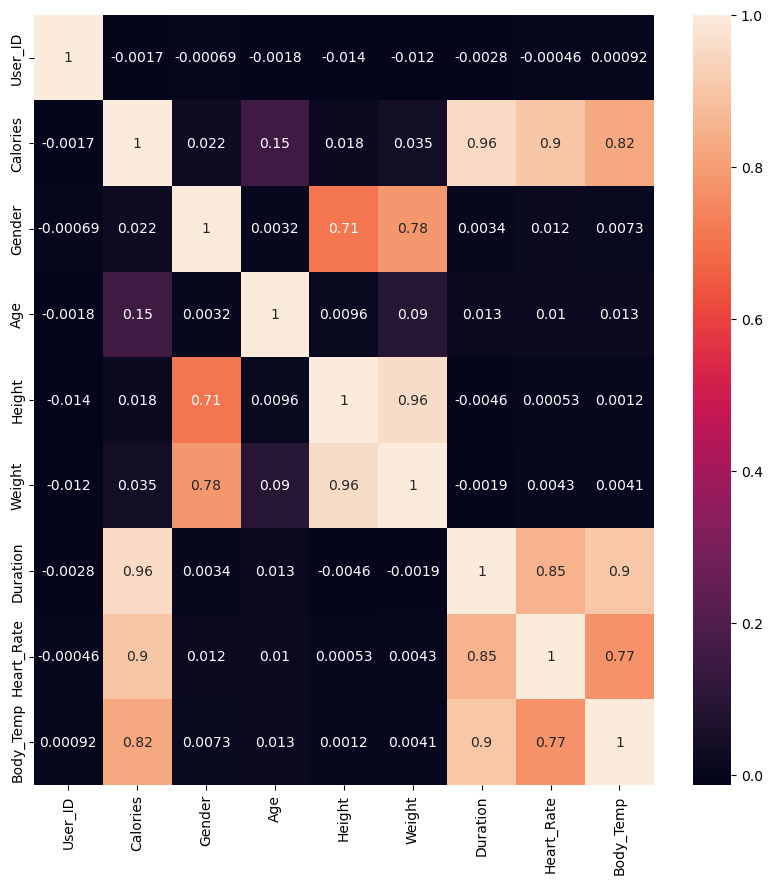

In [142]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(exclude=object).corr(),annot=True)

In [122]:
lb=LabelEncoder()

In [132]:
df['Gender']=lb.fit_transform(df['Gender'])

In [134]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,1,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,0,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,1,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,0,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,0,27,154.0,58.0,10.0,81.0,39.8


In [146]:
X = df.drop(columns=['User_ID','Calories','Gender','Height','Weight'], axis=1)
Y = df['Calories']

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [152]:
lr = LinearRegression()
rfr=RandomForestRegressor(n_estimators=60, random_state=2)
ab=AdaBoostRegressor(n_estimators=80, random_state=2)
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor(max_depth=7)
xg=XGBRegressor(n_estimators=12,random_state=23)

In [154]:
clfs={
    "Linear":lr,
    "RandomForest":rfr,
    "AdaBoost":ab,
    "KNN":knn,
    "DT":dt,
    "XGB":xg  
}

In [174]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    prf=r2_score(y_test, y_pred)
    
    return prf

In [176]:
train_classifier(xg,X_train,Y_train,X_test,Y_test)

0.9854914341735616

In [178]:
r2_scores = []
for name,clf in clfs.items():
    
    current_r2s = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_r2s)
    print("__"*20)
    
    r2_scores.append(current_r2s)
    

For  Linear
Accuracy -  0.9661935728998243
________________________________________
For  RandomForest
Accuracy -  0.9845628336462044
________________________________________
For  AdaBoost
Accuracy -  0.9599274226015763
________________________________________
For  KNN
Accuracy -  0.9830337761024508
________________________________________
For  DT
Accuracy -  0.9774898646254481
________________________________________
For  XGB
Accuracy -  0.9854914341735616
________________________________________


In [179]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'r2_score':r2_scores}).sort_values('r2_score',ascending=False)
performance_df

,Algorithm,r2_score
5,XGB,0.985491
1,RandomForest,0.984563
3,KNN,0.983034
4,DT,0.977490
0,Linear,0.966194
2,AdaBoost,0.959927
